In [1]:
#To read the dataset 
import pandas 
df= pandas.read_csv("Drug.csv") 
print(df) 
#Removing the null values 
print("The head of the dataset \n",df.head()) 
print("The total number of null points in the dataset is \n",df.isnull().sum()) 
df[df['Age'].isnull()] 
d=df.dropna() 
print("The head of the dataset is \n",d.head()) 
print("The missing values in the dataset are \n",d.isnull().sum()) 


      Age      BP Cholesterol  sodium_potassium level   Drug
0    23.0    HIGH        HIGH                  25.355  drugY
1    47.0     LOW        HIGH                  13.093  drugC
2    47.0     LOW        HIGH                  10.114  drugC
3    28.0  NORMAL        HIGH                   7.798  drugX
4    61.0     LOW        HIGH                  18.043  drugY
..    ...     ...         ...                     ...    ...
195  56.0     LOW        HIGH                  11.567  drugC
196  16.0     LOW        HIGH                  12.006  drugC
197  52.0  NORMAL        HIGH                   9.894  drugX
198  23.0  NORMAL      NORMAL                  14.020  drugX
199  40.0     LOW      NORMAL                  11.349  drugX

[200 rows x 5 columns]
The head of the dataset 
     Age      BP Cholesterol  sodium_potassium level   Drug
0  23.0    HIGH        HIGH                  25.355  drugY
1  47.0     LOW        HIGH                  13.093  drugC
2  47.0     LOW        HIGH              

In [2]:
#Encoding the variables. 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder() 
d['BP_n']=le.fit_transform(d['BP']) 
d['cholestrol_n']=le.fit_transform(d['Cholesterol']) 
d['Drug_n']=le.fit_transform(d['Drug']) 
print(d) 
d=d.drop(["BP","Cholesterol","Drug"],axis='columns') 
print(d)

      Age      BP Cholesterol  sodium_potassium level   Drug  BP_n  \
0    23.0    HIGH        HIGH                  25.355  drugY     0   
1    47.0     LOW        HIGH                  13.093  drugC     1   
2    47.0     LOW        HIGH                  10.114  drugC     1   
3    28.0  NORMAL        HIGH                   7.798  drugX     2   
4    61.0     LOW        HIGH                  18.043  drugY     1   
..    ...     ...         ...                     ...    ...   ...   
195  56.0     LOW        HIGH                  11.567  drugC     1   
196  16.0     LOW        HIGH                  12.006  drugC     1   
197  52.0  NORMAL        HIGH                   9.894  drugX     2   
198  23.0  NORMAL      NORMAL                  14.020  drugX     2   
199  40.0     LOW      NORMAL                  11.349  drugX     1   

     cholestrol_n  Drug_n  
0               0       4  
1               0       2  
2               0       2  
3               0       3  
4               0  

C:\Users\admin\AppData\Local\Temp\ipykernel_17832\1038434225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['BP_n']=le.fit_transform(d['BP'])
C:\Users\admin\AppData\Local\Temp\ipykernel_17832\1038434225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['cholestrol_n']=le.fit_transform(d['Cholesterol'])
C:\Users\admin\AppData\Local\Temp\ipykernel_17832\1038434225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

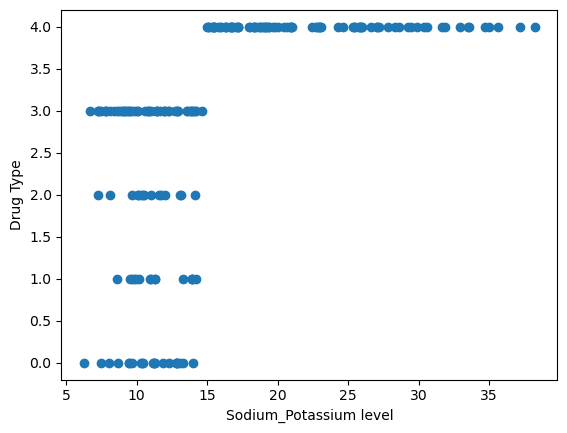

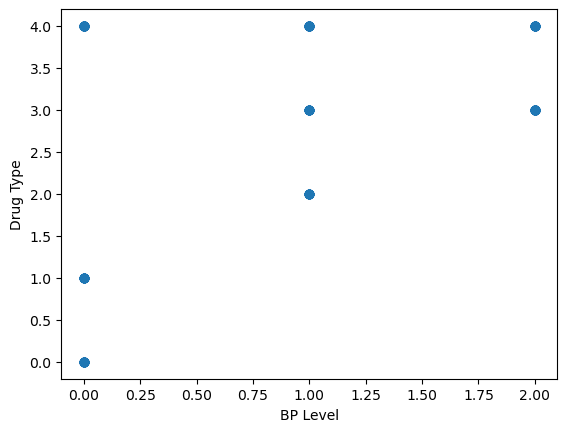

     sodium_potassium level  BP_n  cholestrol_n
0                    25.355     0             0
1                    13.093     1             0
2                    10.114     1             0
3                     7.798     2             0
4                    18.043     1             0
..                      ...   ...           ...
195                  11.567     1             0
196                  12.006     1             0
197                   9.894     2             0
198                  14.020     2             1
199                  11.349     1             1

[191 rows x 3 columns]
     Drug_n
0         4
1         2
2         2
3         3
4         4
..      ...
195       2
196       2
197       3
198       3
199       3

[191 rows x 1 columns]


In [3]:
#Visualising the dataset 
import matplotlib.pyplot as plt 
a=d[d.columns[1]] 
b=d[d.columns[-1]] 
plt.scatter(a,b) 
plt.xlabel("Sodium_Potassium level") 
plt.ylabel("Drug Type") 
plt.show() 
import matplotlib.pyplot as plt 
a=d[d.columns[2]] 
b=d[d.columns[-1]] 
plt.scatter(a,b) 
plt.xlabel("BP Level") 
plt.ylabel("Drug Type") 
plt.show() 
# X and y values 
X=d[d.columns[1:4]] 
y=d[[d.columns[-1]]] 
print(X) 
print(y) 

In [4]:
#model prediction 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30) 
from sklearn import tree 
model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,y_train) 
X_pred=model.predict(X_test) 
model.predict([[7.798,2,0]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3])

Accuracy_score: 0.896551724137931


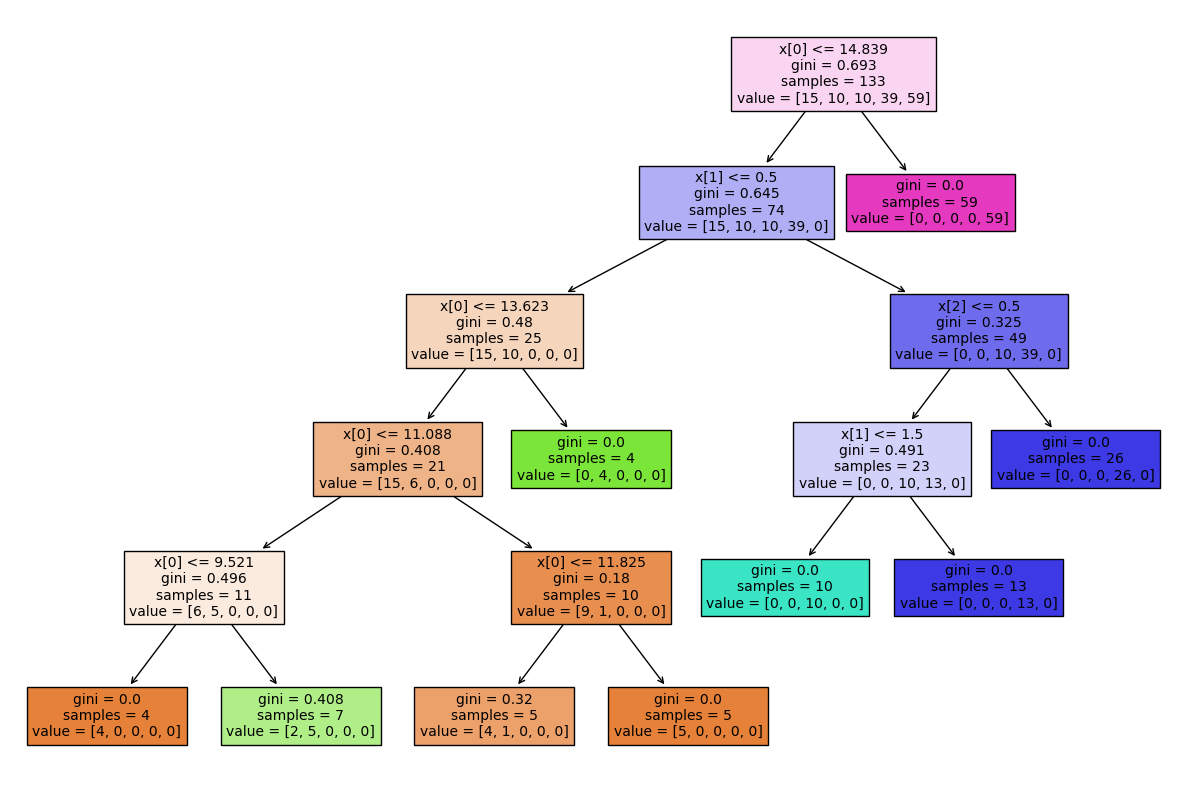

In [5]:
#visualising the tree 
from sklearn.metrics import accuracy_score 
print("Accuracy_score:",accuracy_score(y_test,X_pred)) 
import matplotlib.pyplot as plt 
fig,axes=plt.subplots(figsize=(15,10)) 
tree.plot_tree(model,fontsize=10,filled=True,impurity=True) 
plt.show() 